In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

629

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key


In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lata
Processing Record 2 of Set 1 | lakes entrance
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | ambon
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | kavieng
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | ranau
Processing Record 18 of Set 1 | rocha
Processing Record 19 of Set 1 | dien bien
City not found. Skipping...
Processing Record 20 of Set 1 | antalaha
Processing Record 21 of Set 1 | sibolga
Processing Record 22 of S

Processing Record 35 of Set 4 | gillette
Processing Record 36 of Set 4 | ozuluama
Processing Record 37 of Set 4 | dagda
Processing Record 38 of Set 4 | grindavik
Processing Record 39 of Set 4 | sitka
Processing Record 40 of Set 4 | half moon bay
Processing Record 41 of Set 4 | nanortalik
Processing Record 42 of Set 4 | trincomalee
Processing Record 43 of Set 4 | rungata
City not found. Skipping...
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | freeport
Processing Record 47 of Set 4 | bayanday
Processing Record 48 of Set 4 | moroni
Processing Record 49 of Set 4 | santa rosa
Processing Record 50 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 1 of Set 5 | sunnyside
Processing Record 2 of Set 5 | hunza
City not found. Skipping...
Processing Record 3 of Set 5 | marataizes
Processing Record 4 of Set 5 | kahului
Processing Record 5 of Set 5 | guerrero negro
Processing Record 6 of Set 5 | inuvik
Proc

Processing Record 25 of Set 8 | lavrentiya
Processing Record 26 of Set 8 | tautira
Processing Record 27 of Set 8 | palmer
Processing Record 28 of Set 8 | kholodnyy
Processing Record 29 of Set 8 | tiksi
Processing Record 30 of Set 8 | arman
Processing Record 31 of Set 8 | uribia
Processing Record 32 of Set 8 | mamallapuram
Processing Record 33 of Set 8 | kayes
Processing Record 34 of Set 8 | lolua
City not found. Skipping...
Processing Record 35 of Set 8 | iskateley
Processing Record 36 of Set 8 | sogdiondon
City not found. Skipping...
Processing Record 37 of Set 8 | diu
Processing Record 38 of Set 8 | vao
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | caravelas
Processing Record 41 of Set 8 | te anau
Processing Record 42 of Set 8 | curup
Processing Record 43 of Set 8 | straja
Processing Record 44 of Set 8 | bireun
Processing Record 45 of Set 8 | santarem
Processing Record 46 of Set 8 | acapulco
Processing Record 47 of Set 8 | kangundo
Processing Record 48 of S

Processing Record 15 of Set 12 | unai
Processing Record 16 of Set 12 | kardamaina
Processing Record 17 of Set 12 | linden
Processing Record 18 of Set 12 | dicabisagan
Processing Record 19 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 12 | krasnoselkup
Processing Record 21 of Set 12 | along
Processing Record 22 of Set 12 | bilma
Processing Record 23 of Set 12 | graaff-reinet
Processing Record 24 of Set 12 | orlik
Processing Record 25 of Set 12 | prince rupert
Processing Record 26 of Set 12 | kassala
Processing Record 27 of Set 12 | toulon
Processing Record 28 of Set 12 | zheleznodorozhnyy
Processing Record 29 of Set 12 | merritt island
Processing Record 30 of Set 12 | hirado
Processing Record 31 of Set 12 | hamina
Processing Record 32 of Set 12 | nemuro
Processing Record 33 of Set 12 | padang
Processing Record 34 of Set 12 | maarianhamina
Processing Record 35 of Set 12 | houma
Processing Record 36 of Set 12 | shebalino
Processing Record 37 of Set 12 |

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lata,40.1629,-8.3327,54.91,98,44,1.79,PT,2022-09-28 02:01:17
1,Lakes Entrance,-37.8811,147.9810,58.15,90,66,10.07,AU,2022-09-28 02:01:18
2,Vaini,-21.2000,-175.2000,74.61,83,0,10.78,TO,2022-09-28 02:01:18
3,Punta Arenas,-53.1500,-70.9167,42.91,75,0,12.66,CL,2022-09-28 01:59:45
4,Longyearbyen,78.2186,15.6401,33.64,93,20,2.30,SJ,2022-09-28 02:01:19
5,Ambon,-3.6954,128.1814,87.94,70,40,4.61,ID,2022-09-28 02:01:20
6,Port Alfred,-33.5906,26.8910,67.17,99,100,8.99,ZA,2022-09-28 02:01:21
7,Sao Filipe,14.8961,-24.4956,78.22,73,42,6.62,CV,2022-09-28 02:01:22
8,Kapaa,22.0752,-159.3190,84.18,69,12,4.00,US,2022-09-28 02:01:23
9,Kavieng,-2.5744,150.7967,84.97,63,88,14.34,PG,2022-09-28 02:01:24


In [14]:
#Reorder the columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lata,PT,2022-09-28 02:01:17,40.1629,-8.3327,54.91,98,44,1.79
1,Lakes Entrance,AU,2022-09-28 02:01:18,-37.8811,147.9810,58.15,90,66,10.07
2,Vaini,TO,2022-09-28 02:01:18,-21.2000,-175.2000,74.61,83,0,10.78
3,Punta Arenas,CL,2022-09-28 01:59:45,-53.1500,-70.9167,42.91,75,0,12.66
4,Longyearbyen,SJ,2022-09-28 02:01:19,78.2186,15.6401,33.64,93,20,2.30
5,Ambon,ID,2022-09-28 02:01:20,-3.6954,128.1814,87.94,70,40,4.61
6,Port Alfred,ZA,2022-09-28 02:01:21,-33.5906,26.8910,67.17,99,100,8.99
7,Sao Filipe,CV,2022-09-28 02:01:22,14.8961,-24.4956,78.22,73,42,6.62
8,Kapaa,US,2022-09-28 02:01:23,22.0752,-159.3190,84.18,69,12,4.00
9,Kavieng,PG,2022-09-28 02:01:24,-2.5744,150.7967,84.97,63,88,14.34


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

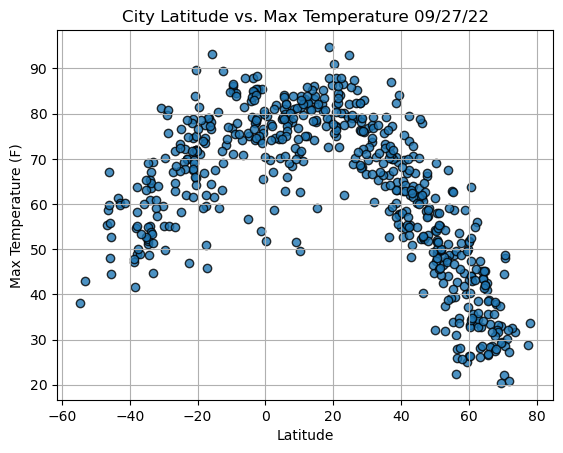

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

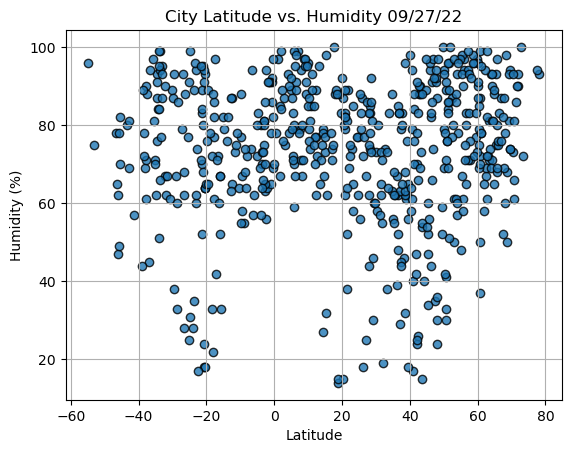

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

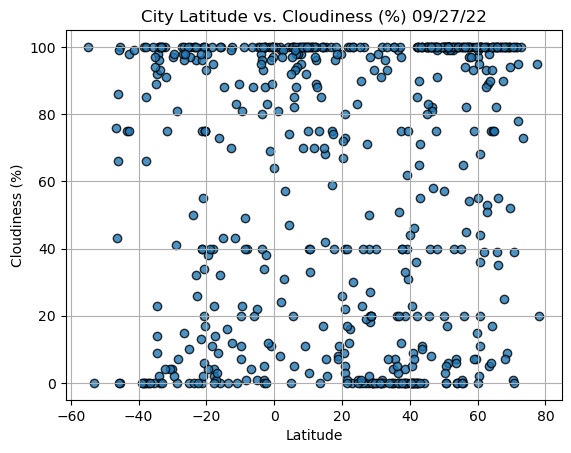

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

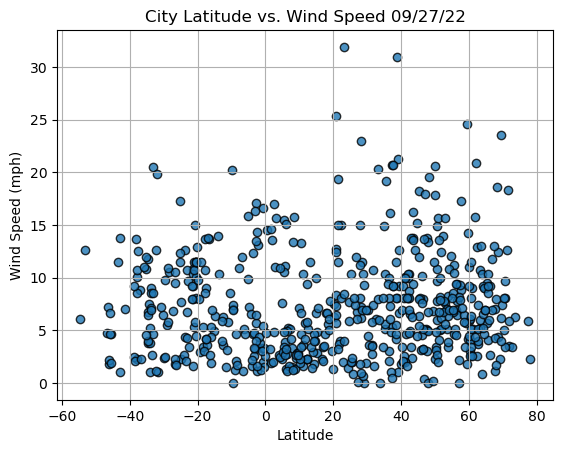

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2022-09-28 02:01:27
Lat                        3.0707
Lng                      172.7902
Max Temp                    81.84
Humidity                       75
Cloudiness                     57
Wind Speed                   15.7
Name: 13, dtype: object

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lata,PT,2022-09-28 02:01:17,40.1629,-8.3327,54.91,98,44,1.79
4,Longyearbyen,SJ,2022-09-28 02:01:19,78.2186,15.6401,33.64,93,20,2.30
7,Sao Filipe,CV,2022-09-28 02:01:22,14.8961,-24.4956,78.22,73,42,6.62
8,Kapaa,US,2022-09-28 02:01:23,22.0752,-159.3190,84.18,69,12,4.00
10,Margate,GB,2022-09-28 02:01:22,51.3813,1.3862,49.69,84,6,5.01


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

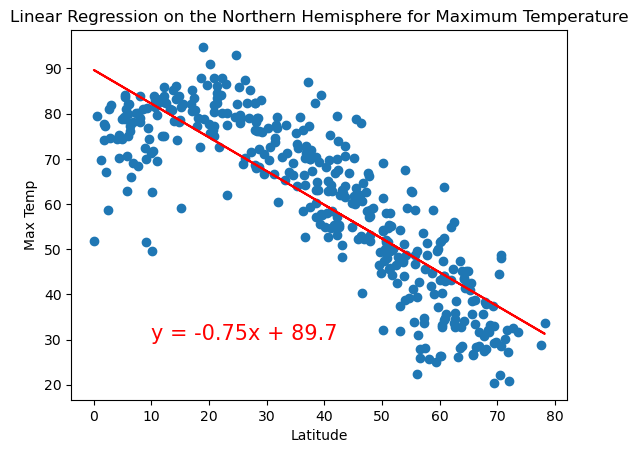

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for Maximum Temperature', 'Max Temp',(10,30))

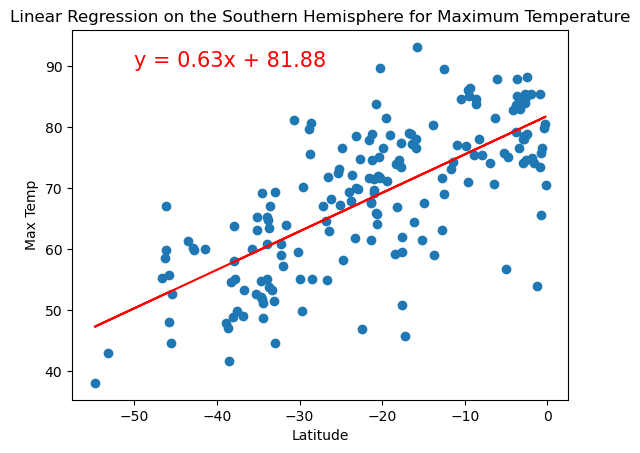

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for Maximum Temperature', 'Max Temp',(-50,90))

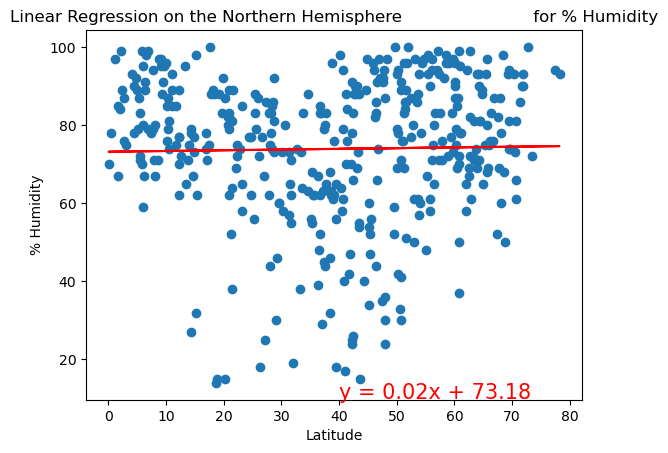

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

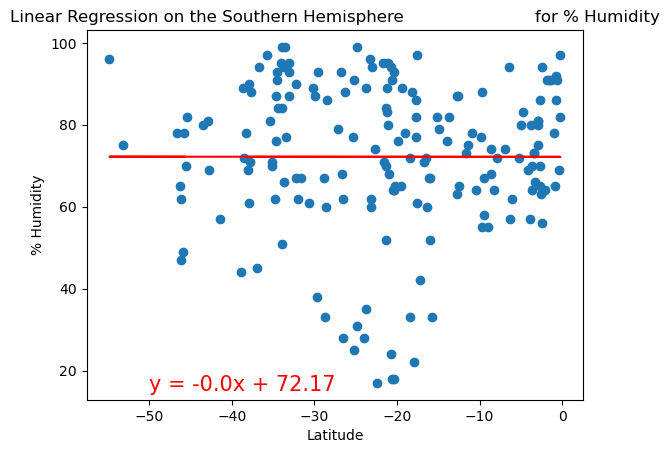

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

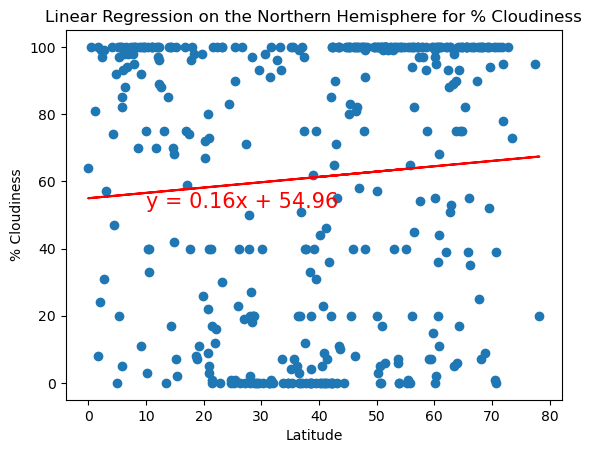

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Cloudiness', '% Cloudiness',(10,52))

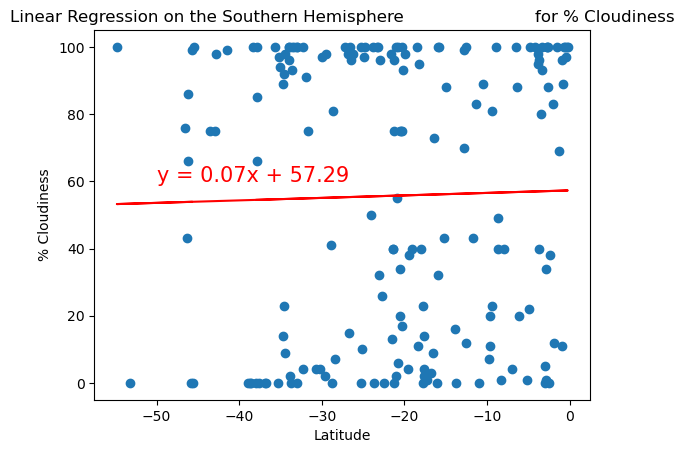

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

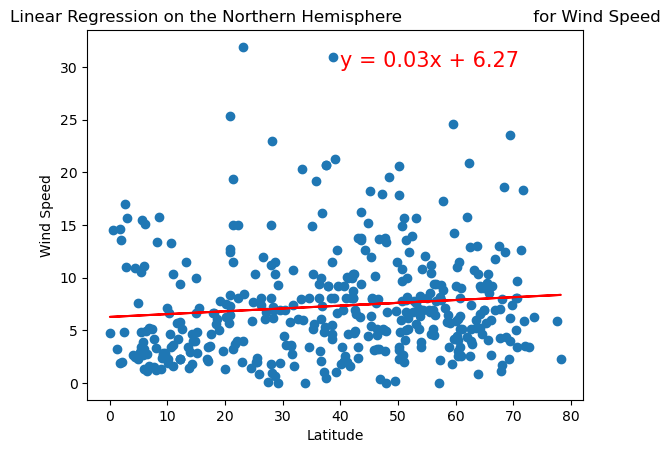

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

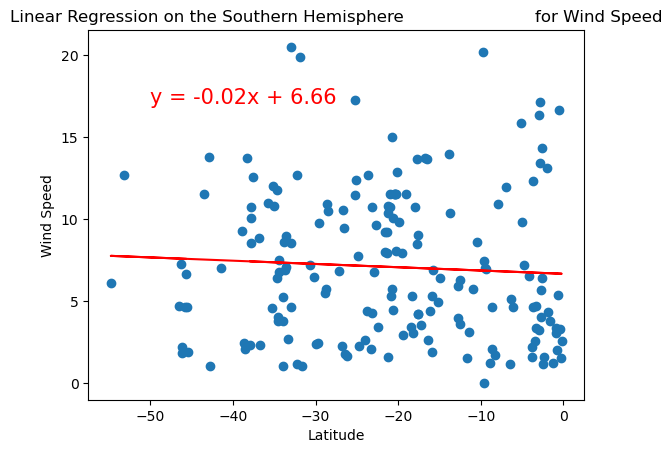

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,17))